## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [6]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

In [9]:
results = {}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
patience_value = [10, 25]
for i in patience_value:
    earlystop = EarlyStopping(monitor="val_loss", 
                          patience=i, 
                          verbose=1
                          )
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = f"patience_value_{i}"
    results[exp_name_tag] = {'train_loss': train_loss,
                            'valid_loss':valid_loss,
                            'train_acc':train_acc,
                            'valid_acc':valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 2s 44us/step - loss: 0.5534 - acc: 0.8345 - val_loss: 1.7553 - val_acc: 0.4769
Epoch 16/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.5341 - acc: 0.8440 - val_loss: 1.7701 - val_acc: 0.4693
Epoch 17/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.5158 - acc: 0.8499 - val_loss: 1.7858 - val_acc: 0.4696
Epoch 18/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4964 - acc: 0.8578 - val_loss: 1.8139 - val_acc: 0.4702
Epoch 19/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4774 - acc: 0.8668 - val_loss: 1.8370 - val_acc: 0.4708
Epoch 20/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.4594 - acc: 0.8727 - val_loss: 1.8660 - val_acc: 0.4640
Epoch 21/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.4422 - acc: 0.8789 - val_loss: 1.8556 - val_acc: 0.4699
Epoch 22/50
50000/50000 [=====================

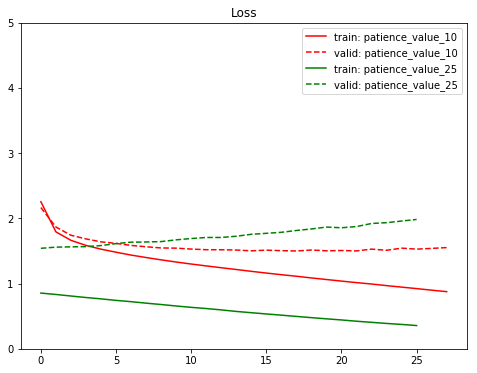

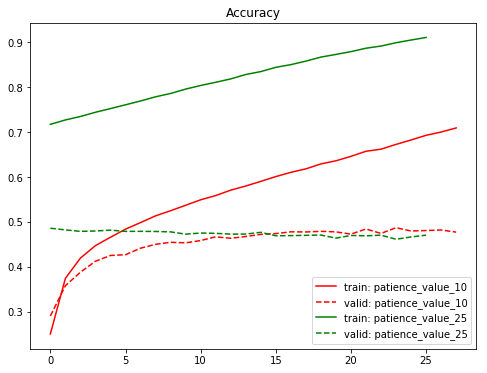

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
results = {}
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
monitor_value = ['train_loss', 'valid_loss', 'valid_acc']
for i in monitor_value:
    earlystop = EarlyStopping(monitor= i, 
                          patience=5, 
                          verbose=1
                          )
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = f"monitor_value_{i}"
    results[exp_name_tag] = {'train_loss': train_loss,
                            'valid_loss':valid_loss,
                            'train_acc':train_acc,
                            'valid_acc':valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
__________

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `train_loss` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 2s 45us/step - loss: 1.8059 - acc: 0.3696 - val_loss: 1.8577 - val_acc: 0.3625
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6688 - acc: 0.4166 - val_loss: 1.7548 - val_acc: 0.3850
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5910 - acc: 0.4418 - val_loss: 1.6834 - val_acc: 0.4147
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5318 - acc: 0.4637 - val_loss: 1.6237 - val_acc: 0.4263
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4811 - acc: 0.4815 - val_loss: 1.6242 - val_acc: 0.4273
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4386 - acc: 0.4955 - val_loss: 1.5878 - val_acc: 0.4425
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.3995 - acc: 0.5131 - val_loss: 1.5748 - val_acc: 0.4470
Epoch 9/50
50000/50000 [============================

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `valid_loss` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 2s 46us/step - loss: 0.3738 - acc: 0.9033 - val_loss: 1.9367 - val_acc: 0.4708
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.3558 - acc: 0.9103 - val_loss: 1.9175 - val_acc: 0.4744
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.3386 - acc: 0.9176 - val_loss: 1.9512 - val_acc: 0.4659
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.3243 - acc: 0.9231 - val_loss: 1.9761 - val_acc: 0.4675
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.3104 - acc: 0.9276 - val_loss: 1.9955 - val_acc: 0.4723
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.2944 - acc: 0.9325 - val_loss: 2.0150 - val_acc: 0.4686
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.2818 - acc: 0.9382 - val_loss: 2.0270 - val_acc: 0.4722
Epoch 9/50
50000/50000 [============================

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `valid_acc` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 2s 45us/step - loss: 0.0364 - acc: 0.9992 - val_loss: 2.8675 - val_acc: 0.4615
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.0350 - acc: 0.9992 - val_loss: 2.8621 - val_acc: 0.4603
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.0334 - acc: 0.9995 - val_loss: 2.8731 - val_acc: 0.4613
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.0322 - acc: 0.9995 - val_loss: 2.8945 - val_acc: 0.4627
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.0314 - acc: 0.9995 - val_loss: 2.9146 - val_acc: 0.4595
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.0306 - acc: 0.9996 - val_loss: 2.9362 - val_acc: 0.4648
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.0296 - acc: 0.9997 - val_loss: 2.9356 - val_acc: 0.4648
Epoch 9/50
50000/50000 [============================

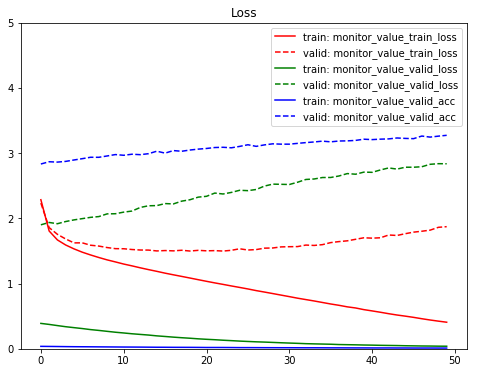

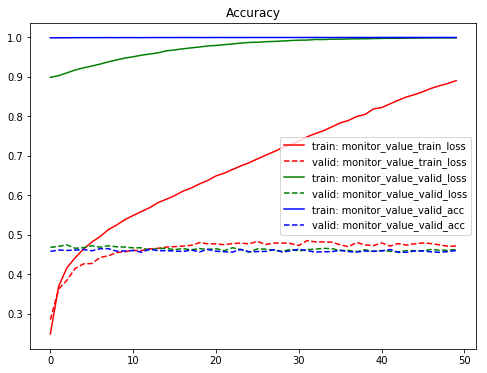

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()